In [1]:

#import libraries
import pandas as pd
import numpy as np

In [2]:
#import the dataset
df=pd.read_csv('metal_binding_data.csv')

In [3]:
df.head()

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"1,2,3,4,5,6","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
2,2,P09871,MWCIVLFSLLAWVYAEPTMYGEILSPNYPQAYPSEVEKSWDIEVPE...,NaN,NaN
3,3,P00917,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,"95,97,120","Zinc 1,Zinc 1,Zinc 1"
4,4,Q9ULX7,MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...,NaN,NaN


In [4]:
#Drop Nan values
df2=df.dropna(axis=0)

In [5]:
#Consider the protein sequence between 50 to 1000
df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)].head()

,Unnamed: 0,PID,SEQUENCE,SITES,METAL
0,0,C7C422,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,"1,2,3,4,5,6","Zinc 1,Zinc 1,Zinc 2,Zinc 1,Zinc 2,Zinc 2"
1,1,Q07009,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...,"89,91,96,175,229,230,292,299,319,323,542,545,5...","Calcium 3,Calcium 3,Calcium 3,Calcium 3,Calciu..."
3,3,P00917,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,"95,97,120","Zinc 1,Zinc 1,Zinc 1"
11,11,P51399,MPSYTVTVATGSQWFAGTDDYIYLSLIGSAGCSEKHLLDKAFYNDF...,"17,18,19,44,45,47,79,80","Calcium 1,Calcium 2,Calcium 2,Calcium 2,Calciu..."
17,17,P00433,MHFSSSSTLFTCITLIPLVCLILHASLSDAQLTPTFYDNSCPNVSN...,"73,76,78,80,82,94,201,252,255,260","Calcium 1,Calcium 1,Calcium 1,Calcium 1,Calciu..."


In [6]:
final_sequence=df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['SEQUENCE']

In [7]:
final_sequence.shape

(18531,)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
encoded_metal=vectorizer.fit_transform(df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['METAL'])
print(vectorizer.get_feature_names_out())

['cadmium' 'calcium' 'cobalt' 'copper' 'iron' 'magnesium' 'manganese'
 'nickel' 'potassium' 'sodium' 'zinc']


In [9]:
encoded_metal.shape

(18531, 11)

In [10]:
encoded_metal.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
#vectorizer.get_feature_names()[0]=='cadmium'

In [12]:
#metals=vectorizer.get_feature_names()

In [13]:
#type(metals[0])

In [14]:
metals_list=['calcium','copper','iron','magnesium','manganese','zinc']
values=[1812,213,2743,5557,2491,5532]

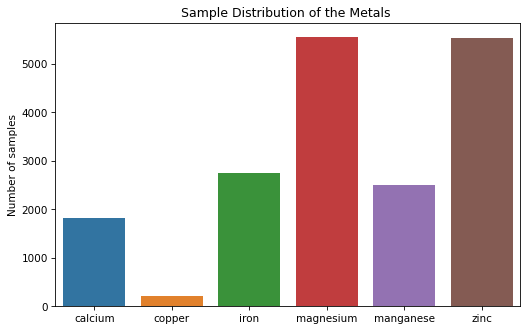

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
ax=sns.barplot(x=metals_list,y=values)
ax.set_title("Sample Distribution of the Metals ")
ax.set_ylabel("Number of samples")
#ax.set_xlabel("Number of samples")
plt.show()

In [16]:
#encoded_metal[:5000].toarray()

In [16]:
#print(np.count_nonzero(encoded_metal.toarray() > 0, axis=0))

In [17]:
# #!conda install -c conda-forge matplotlib
# from matplotlib import pyplot as plt
# plt.hist(values)
# plt.show()

In [19]:
#np.save('5000_metal_emb.npy', encoded_metal[:5000].toarray())

In [18]:
#load the embeddings
embedded_sequence1=np.load('5000_sequence_emb.npy')
embedded_sequence2=np.load('5000_10000sequence.npy')
embedded_sequence3=np.load('10000_15000sequence.npy')
embedded_sequence4=np.load('15000_18000sequence.npy')

In [19]:
embedded_sequence11=np.vstack((embedded_sequence1, embedded_sequence2))

In [20]:
embedded_sequence12=np.vstack((embedded_sequence11, embedded_sequence3))

In [21]:
embedded_sequence=np.vstack((embedded_sequence12, embedded_sequence4))

In [22]:
embedded_sequence.shape

(18531, 1024)

In [25]:
# Embedding generation
from biotransformers import BioTransformers
bio_trans = BioTransformers(backend="protbert")
embeddings = bio_trans.compute_embeddings(final_sequence, pool_mode=('cls'),batch_size=64)

cls_emb = embeddings['cls']

In [23]:
#cls_emb

In [24]:
#np.save('5000_1000_sequence.npy',cls_emb)

In [25]:
#np.array(final_site[0].split(','),int)

In [26]:
#embedded_sequence=np.load('5000_sequence_emb.npy')

In [27]:
#embedded_sequence.shape

In [28]:
final_site=df2[(df2['SEQUENCE'].str.len()>50) & (df2['SEQUENCE'].str.len()<1000)]['SITES']

In [29]:
final_site

0                                               1,2,3,4,5,6
1         89,91,96,175,229,230,292,299,319,323,542,545,5...
3                                                 95,97,120
11                                  17,18,19,44,45,47,79,80
17                        73,76,78,80,82,94,201,252,255,260
                                ...                        
101350                               92,114,114,116,117,200
101351                               92,114,114,116,117,200
101352                               87,106,106,108,109,200
101353                               90,112,112,114,115,200
101354                               92,115,115,117,118,200
Name: SITES, Length: 18531, dtype: object

In [30]:
final_site.index=np.arange(18531)

In [31]:
final_site.head()

0                                          1,2,3,4,5,6
1    89,91,96,175,229,230,292,299,319,323,542,545,5...
2                                            95,97,120
3                              17,18,19,44,45,47,79,80
4                    73,76,78,80,82,94,201,252,255,260
Name: SITES, dtype: object

In [32]:
np.__version__

'1.23.4'

In [36]:
#List of the site information
li=[]

In [37]:
for i in range(0,18531):
    li.append(np.array(final_site[i].split(','),int))

In [38]:
li=np.array(li)

C:\Users\fsshi\AppData\Local\Temp/ipykernel_5816/388172736.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  li=np.array(li)


In [39]:
li

array([array([1, 2, 3, 4, 5, 6]),
       array([ 89,  91,  96, 175, 229, 230, 292, 299, 319, 323, 542, 545, 547,
              552, 585, 587, 589, 591, 596, 615, 617, 619, 621, 626, 658, 661]),
       array([ 95,  97, 120]), ..., array([ 87, 106, 106, 108, 109, 200]),
       array([ 90, 112, 112, 114, 115, 200]),
       array([ 92, 115, 115, 117, 118, 200])], dtype=object)

In [40]:
type(li[0][0])

numpy.int32

In [41]:
li.shape

(18531,)

In [42]:
#np.array(final_site[0].split(','),int)

In [43]:
# embeddings and sites array
arr=np.zeros((18531,1024))
sites=np.zeros((18531,1000))

In [44]:
arr.shape

(18531, 1024)

In [45]:
final_site[0]

'1,2,3,4,5,6'

In [46]:
for i in range(0,18531):
    for j in li[i]:
        arr[i][j]=1

In [47]:
for i in range(0,18531):
    for j in li[i]:
        sites[i][j]=1

In [48]:
arr.shape

(18531, 1024)

In [49]:
arr

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
sites.shape

(18531, 1000)

In [51]:
#np.save('18531_sites_emb.npy', arr)

In [52]:
#concatanate_sequence=np.add(embedded_sequence[:4800],arr[:4800].astype(np.int64),dtype=None)

In [53]:
#concatanate_sequence

In [54]:
# from tensorflow.keras.models import load_model

In [55]:
#model = load_model('model.h5')

In [56]:
#test_data1=np.add(embedded_sequence[4800:5000],arr[4800:5000].astype(np.int64),dtype=None)

In [57]:
# yhat = model.predict(test_data1)
# yhat = yhat.round()
# acc = accuracy_score(embedded_metal[4800:5000].astype(np.int64), yhat)

In [58]:
#acc

In [59]:
#test_data2=np.add(embedded_sequence[4800:5000],arr[4600:4800].astype(np.int64),dtype=None)

In [60]:
# yhat = model.predict(test_data2)
# yhat = yhat.round()
# acc = accuracy_score(embedded_metal[4800:5000].astype(np.int64), yhat)
# print(acc)

In [61]:
# yhat

In [56]:
concatanate_sequence_final=np.add(embedded_sequence,arr.astype(np.int64),dtype=None)

In [57]:
concatanate_sequence_final.shape

(18531, 1024)

In [58]:
encoded_metal.shape

(18531, 11)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1280)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          640500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 300)          150300      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          30100       dense_1[0][0]                    
______________________________________________________________________________________________

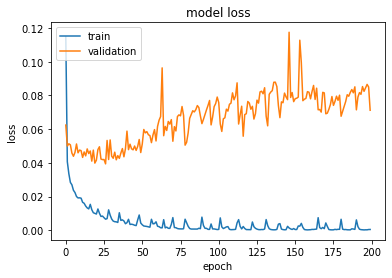

[array([[1.72899625e-33, 1.81858741e-16, 0.00000000e+00, ...,
        1.53824890e-38, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.19087205e-31, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.06434375e-17, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 8.72538928e-22, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.98759936e-16],
       [3.67026436e-20, 1.76772896e-09, 5.71480580e-24, ...,
        1.05906968e-25, 2.62976900e-15, 1.00000000e+00],
       [1.11829929e-37, 2.66806840e-13, 1.24857692e-29, ...,
        2.02000726e-32, 1.06525136e-35, 9.99945045e-01]], dtype=float32), array([[8.1233038e-06, 6.1435939e-24, 9.5682383e-01, ..., 4.8213736e-23,
        1.4134956e-22, 9.9520149e-23],
       [1.6534321e-23, 1.1703091e-31, 0.0000000e+00, ..., 1.0103617e-28,
        2.7101030e-22, 4.7364763e-31],
       [9.4202819e-18, 9.7254551e-36, 

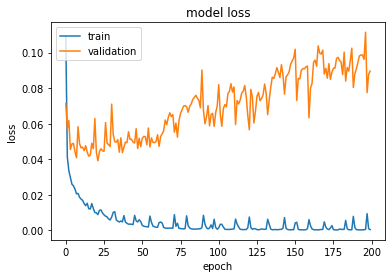

[array([[0.00000000e+00, 1.62230262e-34, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.17498589e-31, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 5.36005300e-23, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.27004594e-25, 2.15304385e-10, 1.15645176e-35, ...,
        2.31406219e-30, 1.65722875e-36, 3.01796174e-19],
       [3.51359658e-25, 5.16509985e-14, 2.18332667e-22, ...,
        3.44779705e-23, 5.35556629e-27, 9.69476439e-14]], dtype=float32), array([[6.7615122e-24, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1356520e-26, 0.0000000e+00, 0.0000000e+00, ..., 1.1286880e-37,
        4.8800588e-34, 8.4956458e-36],
       [7.5307863e-18, 2.2537514e-36, 

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model

arr=np.zeros((18531, 1280))
for i in range(0,18531):
    for j in li[i]:
        arr[i][j]=1
        
sites=np.zeros((18531, 1000))
for i in range(0,18531):
    for j in li[i]:
        sites[i][j]=1  

embedding=np.load('E:\PHD_Research\Biomedical_Research\MetaLLM_for_Journal\Lmeatlsite data\metallm_esm_embedding.npy')        
merged_embedding=np.add(embedding,arr.astype(np.int64),dtype=None)



# get the model
def get_model(n_inputs, n_outputs):
	inputs = Input(shape=(n_inputs,))
	#model = Sequential()
	x=Dense(500, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu')(inputs)
	#model.add(Dropout(0.2)) 
	x=(Dense(300, activation='relu'))(x)
	#model.add(Dropout(0.2))
	x=Dense(100, activation='relu')(x)
	#model.add(Dense(n_outputs, activation='sigmoid'))
	out1=Dense(n_outputs, activation='sigmoid')(x)
	out2=Dense(sites.shape[1], activation='sigmoid')(x)
	model=Model(inputs, [out1,out2])
	model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
	return model

 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y,seq):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	seq_len=seq.shape[1]
	#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	skf = StratifiedKFold(n_splits=10)
	# enumerate folds
	for train_ix, test_ix in skf.split(X,np.zeros(shape=(X.shape[0], 1))):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		sites_train,sites_test=seq[train_ix],seq[test_ix]
		model = get_model(n_inputs, n_outputs)
		print(model.summary())
		#model.save("protein_model.h5")
		history=model.fit(X_train, [y_train,sites_train],validation_split=0.2, verbose=0, epochs=200)
		model.save("sites_model.h5")        
		history_dict = history.history
		#print(history_dict)
		#print("In the middle of a string: {}".format(list(history_dict.key())))
		#plt.plot(history.history['accuracy'])
		#plt.plot(history.history['val_accuracy'])
		#plt.title('model accuracy')
		#plt.ylabel('accuracy')
		#plt.xlabel('epoch')
		#plt.legend(['train', 'validation'], loc='lower right')
		#plt.show()
		# summarize history for loss
		plt.plot(history.history['loss'])
		plt.plot(history.history['val_loss'])
		plt.title('model loss')
		plt.ylabel('loss')
		plt.xlabel('epoch')
		plt.legend(['train', 'validation'], loc='upper left')
		plt.show()
		yhat = model.predict(X_test)
		print(yhat)
		#yhat = yhat.round()
		#print(yhat)
		#print(multilabel_confusion_matrix(y_test, yhat))
		#acc = accuracy_score(y_test, yhat)
		#print(classification_report(y_test, yhat))
# 		# precision recall curve
# 		precision = dict()
# 		recall = dict()
# 		for i in range(11):
# 			precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
#                                                         yhat[:, i])
# 			plt.plot(recall[i], lw=2, label='class {}'.format(i))    
# 		plt.xlabel("recall")
# 		#plt.ylabel("precision")
# 		plt.legend(loc="best")
# 		plt.title("precision vs. recall curve")
# 		plt.show()
# 		# store result
		#print('Accuracy is: >%.3f' % acc)
		results.append(yhat)
	return results
 
# load dataset

# evaluate model
results = evaluate_model(merged_embedding, encoded_metal.toarray().astype(np.int64),sites)

# summarize performance
#print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [94]:
model.summary()

NameError: name 'model' is not defined

In [59]:
from tensorflow.keras.models import load_model
model = load_model('binding_site_model.h5')

In [60]:
#merged_embedding.shape

In [61]:
model.summary()
yhat = model.predict(merged_embedding)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 500)               640500    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_19 (Dense)             (None, 11)                1111      
Total params: 822,011
Trainable params: 822,011
Non-trainable params: 0
________________________________________________

NameError: name 'merged_embedding' is not defined

In [147]:
yhat[1][0].round()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [62]:
import numpy as np
zn_embedding=np.load('E:\PHD_Research\Biomedical_Research\MetaLLM_for_Journal\Lmeatlsite data\Zn_esm_embedding.npy')
ca_embedding=np.load('E:\PHD_Research\Biomedical_Research\MetaLLM_for_Journal\Lmeatlsite data\Ca_esm_embedding.npy')
mn_embedding=np.load('E:\PHD_Research\Biomedical_Research\MetaLLM_for_Journal\Lmeatlsite data\Mn_esm_embedding.npy')
mg_embedding=np.load('E:\PHD_Research\Biomedical_Research\MetaLLM_for_Journal\Lmeatlsite data\Mg_esm_embedding.npy')

In [63]:
import pandas as pd
zn_df=pd.read_csv('E:\PHD_Research\Biomedical_Research\MetaLLM_for_Journal\Lmeatlsite data\Zn.txt')

In [64]:
len(zn_df.iloc[0::3].values[0][0])

200

In [65]:
k=[]
for i in range(len(zn_df.iloc[0::3].values[0][0])):
    k.append(zn_df.iloc[0::3].values[0][0][i])

In [66]:
k

['L',
 'T',
 'E',
 'Q',
 'Q',
 'R',
 'R',
 'E',
 'L',
 'D',
 'W',
 'E',
 'K',
 'T',
 'D',
 'G',
 'L',
 'M',
 'P',
 'V',
 'I',
 'V',
 'Q',
 'H',
 'A',
 'V',
 'S',
 'G',
 'E',
 'V',
 'L',
 'M',
 'L',
 'G',
 'Y',
 'M',
 'N',
 'P',
 'E',
 'A',
 'L',
 'D',
 'K',
 'T',
 'I',
 'E',
 'S',
 'G',
 'K',
 'V',
 'T',
 'F',
 'F',
 'S',
 'R',
 'T',
 'K',
 'Q',
 'R',
 'L',
 'W',
 'I',
 'K',
 'G',
 'E',
 'T',
 'S',
 'G',
 'N',
 'F',
 'L',
 'N',
 'V',
 'V',
 'S',
 'I',
 'A',
 'P',
 'D',
 'C',
 'D',
 'N',
 'D',
 'T',
 'L',
 'L',
 'V',
 'L',
 'A',
 'N',
 'P',
 'I',
 'G',
 'P',
 'T',
 'C',
 'H',
 'K',
 'G',
 'T',
 'S',
 'S',
 'C',
 'F',
 'G',
 'N',
 'T',
 'A',
 'H',
 'Q',
 'W',
 'L',
 'F',
 'L',
 'Y',
 'Q',
 'L',
 'E',
 'Q',
 'L',
 'L',
 'A',
 'E',
 'R',
 'K',
 'Y',
 'A',
 'D',
 'P',
 'E',
 'T',
 'S',
 'Y',
 'T',
 'A',
 'K',
 'L',
 'Y',
 'A',
 'S',
 'G',
 'T',
 'K',
 'R',
 'I',
 'A',
 'Q',
 'K',
 'V',
 'G',
 'E',
 'E',
 'G',
 'V',
 'E',
 'T',
 'A',
 'L',
 'A',
 'A',
 'T',
 'V',
 'H',
 'D',
 'R',
 'F',
 'E'

In [67]:
sitess=list(range(len(zn_df.iloc[::3].values[0][0])))

In [68]:
sitess

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [72]:

#positinal encoding
def data_preparation(embedded_sequence,site):
    X=[]
    binding_sites=[]
      #Y=[]

  #embeds=list(embedded_sequence)
  #sites=list(site)
  #metal=list(metalss)
    for j in range(site.iloc[::3].shape[0]):
        
          #for i in range(len(site.iloc[::3].values[j][0])):

            embed=embedded_sequence[j]

            sitess=list(range(len(site.iloc[::3].values[j][0])))
            #print(sites)
            X=X+[embed]*len(sitess)
            binding_sites=binding_sites+sitess
            #Y=Y+metals

    return pd.DataFrame({'embedding':X, 'site':binding_sites})

In [73]:
embedding_df=data_preparation(zn_embedding,zn_df)


In [74]:
embedding_df

,embedding,site
0,"[0.06377882, 0.20964034, 0.112154365, -0.05810...",0
1,"[0.06377882, 0.20964034, 0.112154365, -0.05810...",1
2,"[0.06377882, 0.20964034, 0.112154365, -0.05810...",2
3,"[0.06377882, 0.20964034, 0.112154365, -0.05810...",3
4,"[0.06377882, 0.20964034, 0.112154365, -0.05810...",4
...,...,...
56015,"[-0.004634277, 0.23461331, 0.16673523, 0.00671...",69
56016,"[-0.004634277, 0.23461331, 0.16673523, 0.00671...",70
56017,"[-0.004634277, 0.23461331, 0.16673523, 0.00671...",71
56018,"[-0.004634277, 0.23461331, 0.16673523, 0.00671...",72


In [75]:
# #regex module
# import re
# metal_list=[]
# #original string
# #string1 = "Hello!James12,India2020"
# for i in embedding_df['metal']:
    
#     pattern = r'[0-9]'

# # Match all digits in the string and replace them with an empty string
#     new_string=re.sub(pattern, '',i)
#     metal_list.append(new_string)
# #print(new_string)

In [76]:
def position_embeddings(max_binding_position, d=1280, n=10000):
    P = np.zeros((max_binding_position, d))

    for k in range(max_binding_position):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

In [77]:
max_binding_site=max(embedding_df.site)+1
pos_encodings=position_embeddings(max_binding_site)

In [78]:
# embedding_df['metal_list']=metal_list
# X_X=list(embedding_df.embedding)
# Y=list(embedding_df.metal_list)
# labels=list(set(metal_list))

In [79]:
X_X=list(embedding_df.embedding)
X_site=list(embedding_df.site)
X_site=list(map(lambda x: pos_encodings[x, :], X_site))
X_and_site=np.array([x+s for x,s in zip(X_X, X_site)])
len(X_and_site)

56020

In [80]:
X_and_site.shape

(56020, 1280)

In [81]:
yhat = model.predict(X_and_site)

In [82]:
yy=yhat[:len(zn_df.iloc[0::3].values[0][0])].round()

In [83]:
yy[:,10]

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [84]:
yy

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:

unique, counts = np.unique(yy, return_counts=True)

dict(zip(unique, counts))


{0.0: 2001, 1.0: 199}

In [62]:
import pandas as pd
Mionic=np.array(pd.read_csv(r'C:\Users\fsshi\Downloads\MIonic_6j2l_A_result.csv'))

In [68]:
Mionic[:,1:].shape

(200, 10)

In [69]:
unique, counts = np.unique(Mionic[:,1:], return_counts=True)

dict(zip(unique, counts))

{0.0: 1984, 1.0: 16}

In [71]:
unique, counts = np.unique(yy[:,10], return_counts=True)

dict(zip(unique, counts))

{0.0: 187, 1.0: 13}

In [72]:
unique, counts = np.unique(Mionic[:,10], return_counts=True)

dict(zip(unique, counts))

{0.0: 197, 1.0: 3}

In [47]:
results=pd.DataFrame(yy, columns=['cadmium', 'calcium', 'cobalt', 'copper', 'iron', 'magnesium', 'manganese', 'nickel', 'potassium', 'sodium', 'zinc'] 
                  )
results['residues']=k

In [48]:
results.to_csv('ll.csv')
results

,cadmium,calcium,cobalt,copper,iron,magnesium,manganese,nickel,potassium,sodium,zinc,residues
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,L
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,T
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,E
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Q
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,N
196,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,L
197,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,H
198,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,K


In [151]:
zn_embedding[0]

array([ 0.06377882,  0.20964034,  0.11215436, ..., -0.08597418,
        0.01735575, -0.09316302], dtype=float32)

In [86]:
yhat = model.predict(zn_embedding)
# print(len(yhat))

for i in range(yhat[0].shape[0]):
    for j in range(yhat[0].shape[1]):
        if (yhat[0][i][j])> (0.42):
            yhat[0][i][j] = 1.0
        else:
            yhat[0][i][j]=0.0
            
#yhat = yhat.round()
zn_arr=np.zeros((211, 11))
for i in range(0,211):
    for j in zn_arr[i]:
        zn_arr[i][10]=1
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
acc = accuracy_score(zn_arr, yhat[0])
print(classification_report(zn_arr, yhat[0]))        

IndexError: tuple index out of range

In [87]:
import pandas as pd
zn_df=pd.read_csv('E:\PHD_Research\Biomedical_Research\MetaLLM_for_Journal\Lmeatlsite data\Zn.txt')

In [88]:
zn_df.iloc[1::3].values[4]

array(['10100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'],
      dtype=object)

In [89]:
yhat = model.predict(zn_embedding)

In [90]:
yhat[1][4]

1.0

In [91]:
yhat = model.predict(ca_embedding)
for i in range(yhat.shape[0]):
    for j in range(yhat.shape[1]):
        if (yhat[i][j])> (0.34):
            yhat[i][j] = 1.0
        else:
            yhat[i][j]=0.0
#yhat = yhat.round()
ca_arr=np.zeros((len(ca_embedding), 11))
for i in range(0,len(ca_embedding)):
    for j in zn_arr[i]:
        ca_arr[i][1]=1
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
acc = accuracy_score(ca_arr, yhat)
print(classification_report(ca_arr, yhat)) 

NameError: name 'zn_arr' is not defined

In [92]:
yhat = model.predict(mn_embedding)
#yhat = yhat.round()
for i in range(yhat.shape[0]):
    for j in range(yhat.shape[1]):
        if (yhat[i][j])> (0.5):
            yhat[i][j] = 1.0
        else:
            yhat[i][j]=0.0
mn_arr=np.zeros((len(mn_embedding), 11))
for i in range(0,len(mn_embedding)):
    for j in mn_arr[i]:
        mn_arr[i][6]=1
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
acc = accuracy_score(mn_arr, yhat)
print(classification_report(mn_arr, yhat)) 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.19      0.32        57
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

   micro avg       0.19      0.19      0.19        57
   macro avg       0.09      0.02      0.03        57
weighted avg       1.00      0.19      0.32        57
 samples avg       0.18      0.19      0.19        57



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
yhat = model.predict(mg_embedding)

for i in range(yhat.shape[0]):
    for j in range(yhat.shape[1]):
        if (yhat[i][j])> (0.47):
            yhat[i][j] = 1.0
        else:
            yhat[i][j]=0.0
#yhat = yhat.round()
mg_arr=np.zeros((len(mg_embedding), 11))
for i in range(0,len(mg_embedding)):
    for j in mg_arr[i]:
        mg_arr[i][5]=1
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
acc = accuracy_score(mg_arr, yhat)
print(classification_report(mg_arr, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.40      0.57       235
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

   micro avg       0.39      0.40      0.39       235
   macro avg       0.09      0.04      0.05       235
weighted avg       1.00      0.40      0.57       235
 samples avg       0.39      0.40      0.39       235



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
zn_arr.shape

NameError: name 'zn_arr' is not defined

In [95]:
for i in range(0,211):
    for j in zn_arr[i]:
        zn_arr[i][10]=1

NameError: name 'zn_arr' is not defined

In [96]:
zn_arr

NameError: name 'zn_arr' is not defined

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
acc = accuracy_score(zn_arr, yhat)
print(classification_report(zn_arr, yhat))

NameError: name 'zn_arr' is not defined

In [98]:
precision_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\precision.xlsx')
Recall_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\Recall.xlsx')
f1_score_df=pd.read_excel(r'C:\Users\fsshi\OneDrive\Desktop\f1_score.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fsshi\\OneDrive\\Desktop\\precision.xlsx'

In [99]:
precision_df

NameError: name 'precision_df' is not defined

In [100]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=precision_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("Precision of 10-fold validations ")
ax.set_ylabel("Precision")
ax.set_xlabel("Name of the Metals")
plt.show()

NameError: name 'precision_df' is not defined

<Figure size 600x375 with 0 Axes>

In [101]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=Recall_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("Recall of 10-fold validations ")
ax.set_ylabel("Recall")
ax.set_xlabel("Name of the Metals")
plt.show()


NameError: name 'Recall_df' is not defined

<Figure size 600x375 with 0 Axes>

In [102]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5),dpi=75)
#colors_list = ['#6890F0', '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
ax=sns.boxplot(data=f1_score_df[['calcium','copper','iron','magnesium','manganese','zinc']])
ax.set_title("f1-score of 10-fold validations ")
ax.set_ylabel("f1-score")
ax.set_xlabel("Name of the Metals")
plt.show()

NameError: name 'f1_score_df' is not defined

<Figure size 600x375 with 0 Axes>

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(concatanate_sequence_final, encoded_metal.toarray().astype(np.int64), test_size=0.30, random_state=42)

In [104]:
# using Multi-label kNN classifier
mlknn_classifier = MLkNN()
mlknn_classifier.fit(X_train, y_train)

TypeError: __init__() takes 1 positional argument but 2 were given

In [105]:
predicted = mlknn_classifier.predict(X_test)
  
print(accuracy_score(y_test, predicted))
print(hamming_loss(y_test, predicted))

AttributeError: 'MLkNN' object has no attribute 'knn_'

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}

clf = GridSearchCV(MLkNN(), parameters, scoring='accuracy')
clf.fit(X_train, y_train)

print (clf.best_params_, clf.best_score_)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'k': 1, 's': 0.5} 0.8721763726281043


In [99]:
concatanate_sequence_final

array([[ 0.15101209,  1.02546242,  1.09242898, ..., -0.04835367,
        -0.07915092,  0.04481541],
       [ 0.12256728,  0.0555306 ,  0.07029734, ..., -0.11076083,
        -0.02586194, -0.013535  ],
       [-0.00808507,  0.0127356 ,  0.02969295, ..., -0.07468386,
         0.01465157,  0.07405594],
       ...,
       [ 0.08530541,  0.03129741,  0.06689337, ..., -0.03338583,
        -0.06570822,  0.00468705],
       [ 0.07773305,  0.02043255,  0.02849989, ..., -0.0349138 ,
        -0.06302207,  0.07373454],
       [ 0.14269534,  0.01538233,  0.08532126, ..., -0.04965088,
        -0.07019413,  0.06086601]])

In [85]:
encoded_metal.toarray().shape[0]

18531

In [90]:
ll=encoded_metal.toarray().astype(np.int64)

In [113]:
ll[-3]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [138]:
target=np.zeros((18531, 1))
for i in range(ll.shape[0]):
    for j in range(ll.shape[1]):
        if ll[i][j]==1:
            #print(j)
            target[i]=j
            
            

In [140]:
target

array([[10.],
       [ 1.],
       [10.],
       ...,
       [ 5.],
       [ 5.],
       [ 5.]])

In [141]:
X_train, X_test, y_train, y_test = train_test_split(concatanate_sequence_final, target, test_size=0.20, random_state=42)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
predictions = model.predict(X_test)

In [150]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)


Accuracy =  0.8454275694631778
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.85        62
         1.0       0.73      0.71      0.72       346
         2.0       0.00      0.00      0.00         1
         3.0       0.84      0.46      0.59        35
         4.0       0.93      0.84      0.88       569
         5.0       0.87      0.92      0.89      1050
         6.0       0.84      0.78      0.81       464
         7.0       1.00      0.94      0.97        63
         8.0       1.00      0.92      0.96        13
         9.0       1.00      0.33      0.50        12
        10.0       0.81      0.87      0.84      1092

    accuracy                           0.85      3707
   macro avg       0.82      0.68      0.73      3707
weighted avg       0.85      0.85      0.84      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
model2 = GaussianNB()

In [158]:
# Model training
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Actual Value: [[ 5.]
 [ 5.]
 [ 5.]
 ...
 [10.]
 [ 5.]
 [ 6.]]
Predicted Value: [10.  5. 10. ... 10.  1.  1.]


In [159]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)

Accuracy =  0.5654167790666307
              precision    recall  f1-score   support

         0.0       0.17      0.79      0.28        62
         1.0       0.32      0.60      0.42       346
         2.0       0.02      1.00      0.04         1
         3.0       0.11      0.60      0.19        35
         4.0       0.78      0.68      0.73       569
         5.0       0.84      0.39      0.53      1050
         6.0       0.58      0.59      0.59       464
         7.0       0.98      0.94      0.96        63
         8.0       1.00      0.69      0.82        13
         9.0       0.56      0.75      0.64        12
        10.0       0.67      0.62      0.65      1092

    accuracy                           0.57      3707
   macro avg       0.55      0.69      0.53      3707
weighted avg       0.68      0.57      0.59      3707



In [160]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8613434043701106


In [162]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy =  0.8613434043701106
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69        62
         1.0       0.83      0.68      0.75       346
         2.0       0.00      0.00      0.00         1
         3.0       1.00      0.34      0.51        35
         4.0       0.99      0.81      0.89       569
         5.0       0.86      0.95      0.90      1050
         6.0       0.92      0.77      0.84       464
         7.0       1.00      0.94      0.97        63
         8.0       1.00      0.92      0.96        13
         9.0       1.00      0.17      0.29        12
        10.0       0.79      0.93      0.86      1092

    accuracy                           0.86      3707
   macro avg       0.85      0.64      0.70      3707
weighted avg       0.87      0.86      0.86      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)


C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [164]:
yy=neigh.predict(X_test)

In [165]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, yy))
print(classification_report(y_test, yy))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yy)

Accuracy =  0.8478554086862692
              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79        62
         1.0       0.79      0.73      0.76       346
         2.0       0.00      0.00      0.00         1
         3.0       0.35      0.43      0.38        35
         4.0       0.92      0.89      0.90       569
         5.0       0.75      0.96      0.84      1050
         6.0       0.93      0.78      0.85       464
         7.0       0.98      0.97      0.98        63
         8.0       1.00      0.92      0.96        13
         9.0       0.83      0.42      0.56        12
        10.0       0.95      0.79      0.86      1092

    accuracy                           0.85      3707
   macro avg       0.75      0.71      0.72      3707
weighted avg       0.86      0.85      0.85      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=2, max_depth=5, learning_rate=.1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [170]:
from sklearn import metrics
from sklearn.metrics import classification_report
print ("Accuracy = ", metrics.accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)

Accuracy =  0.7642298354464526
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        62
         1.0       0.72      0.56      0.63       346
         2.0       0.00      0.00      0.00         1
         3.0       0.94      0.46      0.62        35
         4.0       0.95      0.75      0.84       569
         5.0       0.76      0.86      0.80      1050
         6.0       0.83      0.61      0.70       464
         7.0       0.92      0.97      0.95        63
         8.0       0.92      0.85      0.88        13
         9.0       1.00      0.83      0.91        12
        10.0       0.68      0.81      0.74      1092

    accuracy                           0.76      3707
   macro avg       0.79      0.67      0.72      3707
weighted avg       0.78      0.76      0.76      3707



C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fsshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

In [185]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(concatanate_sequence_final) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18531 samples in 0.016s...
[t-SNE] Computed neighbors for 18531 samples in 12.879s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18531
[t-SNE] Computed conditional probabilities for sample 2000 / 18531
[t-SNE] Computed conditional probabilities for sample 3000 / 18531
[t-SNE] Computed conditional probabilities for sample 4000 / 18531
[t-SNE] Computed conditional probabilities for sample 5000 / 18531
[t-SNE] Computed conditional probabilities for sample 6000 / 18531
[t-SNE] Computed conditional probabilities for sample 7000 / 18531
[t-SNE] Computed conditional probabilities for sample 8000 / 18531
[t-SNE] Computed conditional probabilities for sample 9000 / 18531
[t-SNE] Computed conditional probabilities for sample 10000 / 18531
[t-SNE] Computed conditional probabilities for sample 11000 / 18531
[t-SNE] Computed conditional probabilities for sample 12000 / 18531
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'Protein sequence in T-SNE projection')]

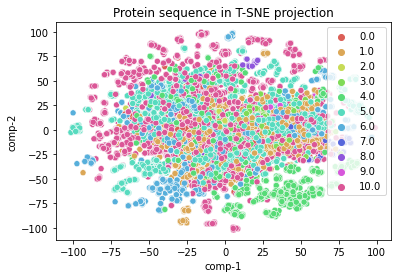

In [186]:
import pandas as pd
df = pd.DataFrame()
#df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=target.flatten(),
                palette=sns.color_palette("hls", 11),
                data=df).set(title="Protein sequence in T-SNE projection")

In [178]:
y_train.shape

(14824, 1)

In [3]:
import numpy as np
o=np.load(r'C:\Users\fsshi\Downloads\ProtTrans_repr_max.npy')

In [5]:
o.shape


(1024,)

In [ ]:
!pip install mymetal

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [6]:
rf=pd.read_excel('E:\PHD_Research\Biomedical_Research\MetalBinding models\metal_listprediction_Lmetalsitemodel.xlsx')

In [7]:
rf

,Unnamed: 0,Actual Label,Predicted Label
0,0,MN,MG
1,1,MN,MG
2,2,MN,MN
3,3,MN,MG
4,4,MN,MG
...,...,...,...
681,681,ZN,ZN
682,682,ZN,ZN
683,683,ZN,ZN
684,684,ZN,ZN


In [8]:
classification_report( rf['Actual Label'],rf['Predicted Label'], output_dict=True)

{'CA': {'precision': 0.8278145695364238,
  'recall': 0.6830601092896175,
  'f1-score': 0.7485029940119761,
  'support': 183.0},
 'MG': {'precision': 0.6618705035971223,
  'recall': 0.7829787234042553,
  'f1-score': 0.7173489278752436,
  'support': 235.0},
 'MN': {'precision': 1.0,
  'recall': 0.3157894736842105,
  'f1-score': 0.4799999999999999,
  'support': 57.0},
 'ZN': {'precision': 0.7447698744769874,
  'recall': 0.8436018957345972,
  'f1-score': 0.7911111111111111,
  'support': 211.0},
 'accuracy': 0.7361516034985423,
 'macro avg': {'precision': 0.8086137369026334,
  'recall': 0.6563575505281701,
  'f1-score': 0.6842407582495826,
  'support': 686.0},
 'weighted avg': {'precision': 0.7597318922523815,
  'recall': 0.7361516034985423,
  'f1-score': 0.7286260792992978,
  'support': 686.0}}